# **Regresión lineal y descenso de gradiente con Python**

En machine learning, el objetivo principal es encontrar un modelo que *capture* el comportamiento de un sistema (en el amplio sentido de la palabra).

A partir de unos datos de entrenamiento, un sistema de aprendizaje automático ha de ser capaz de inferir un modelo capaz de explicar, al menos en su mayoría, los efectos observados. Pero también aplicar ese aprendizaje.

Por ejemplo, un sistema de machine learning muy lucrativo para las empresas anunciantes es aquél que dado un perfil de usuario (datos de entrada A), sea capaz de predecir si pinchará o no (salida B) sobre un anuncio publicitario de, por ejemplo, comida para gatos. No es sencillo crear un modelo capaz de predecir el comportamiento del usuario (o sí), pero en todo caso, existen diferentes técnicas que nos permiten abordar el problema. En el caso del ejemplo que acabamos de ver, el modelo debería ser capaz de clasificar a los usuarios en dos clases diferentes, los que pulsarán y los que no pulsarán el anuncio de comida de gatos.

Otro tipo de problema es aquél en el que se pretende crear un modelo capaz de predecir un valor o una cantidad. Por ejemplo, si conozco los metros cuadrados, el número de habitaciones y el número de baños de una vivienda en venta, ¿seré capaz de predecir por qué precio se venderá?

Uno podría hacerse una idea observando el precio de venta de alguna casa igual o parecida que se haya vendido antes. Si no tenemos ese dato, podremos extrapolar el precio comparando el precio de venta de otras casas y comparando esa casa con la nuestra. Intuitivamente sabemos que a más metros, más precio ¿pero cuanto más? Es probable que entre los metros de la casa y el precio haya una relación lineal, así que aprovechándonos de ello, es relativamente sencillo construir un modelo que nos ayude a predecir el precio de una casa. Así que manos a la obra.

Vamos a basarnos en una técnica estadística llamada regresión lineal, que conceptualmente es bastante sencilla, pero es muy usada en este tipo de problemas.

In [1]:
# importación de librerías
import random;
import matplotlib.pyplot as plt;
import math;

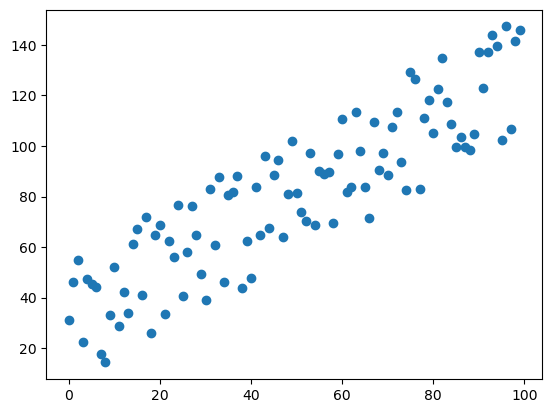

In [2]:
# generamos los datos de prueba.
def gen_data(n, bias,varianza):
    x=[];
    y=[];
    for i in range(0,n):
        x.append(i);
        y.append((i+bias)+(random.uniform(0,2)-1)*varianza);
    return x,y;

random.seed(17);
x,y = gen_data(100,30,25);
plt.scatter(x,y);

Este código genera una serie de datos que sigue básicamente una recta alrededor de la cual se crean los puntos de forma aleatoria usando una función de distribución uniforme con una varianza dada (25 en este caso).

Por seguir con nuestro ejemplo de las casas puede imaginar que en el eje de abscisas se representan los metros cuadrados que tiene la casa y en el las ordenadas el precio en miles de euros por el que se vendió la casa.

La idea es, a partir de todos estos datos, crear un modelo que sea capaz de predecir el precio de cualquier casa dados sus metros cuadrados. En este caso es muy obvio que un buen predictor es una línea recta que se ajuste lo más posible a la nube de puntos. Así pues, nuestro problema ahora es encontrar esa recta, la de mejor ajuste.

La ecuación de una recta en el plano es la siguiente.

$y = a + bx $

Donde $a$ se corresponde con el punto de corte de la recta con el eje de ordenadas y $b$ es la pendiente de la recta, es decir, lo rápido que crece o decrece. La variable independiente $x$ representaría en este caso los metros cuadrados de la casa y la variable $y$ el precio de venta. Por lo tanto, si somos capaces de buscar unos buenos valores para $a$ y $b$, tendremos un modelo lineal para predecir el precio.

Podemos hacerlo de diferentes formas. Típicamente, la recta de regresión se ha calculado a partir de métodos estadísticos, pero si el número de casas que tenemos es muy grande o en vez de una sola variable independiente tenemos varias (metros, número de habitaciones, número de baños, metros de jardín, etc.) puede llegar a ser tedioso cuando no inabordable. Así pues vamos a usar un método para ajustar la recta llamado **descenso de gradiente**.

Lo primero que necesitamos es una forma de medir lo bien o mal que se ajusta una recta a la nube de puntos.

A cada par de valores que probemos para $a$ y $b$ lo vamos a llamar **hipótesis**, y seguidamente comprobaremos cómo se ajusta esa hipótesis calculando un factor de error, que es la suma de lo que, de media, se equivoca dicha hipótesis (recta) al predecir cada uno de los puntos de la nube.

Este error se calcula con:

$error = \frac{1}{2n}\sum_{i=1}^{n}(h(x_i)-y_i)^2$

Donde $h(x_i)$ es la hipótesis que queremos probar. Por ejemplo, si asignamos los valores $a=1$ y $b=2$ entonces tenemos que $h(x_i)=1+2x_i$ siendo $x_i$ cada uno de los valores de $x$ para los metros cuadrados de las casas e $y_i$ los precios de dicha casa.

Como se puede observar, lo que estamos haciendo es restar al precio de la casa que predice nuestra hipótesis (recta) el valor de venta real. Esa diferencia es el error, que se va sumando para todas las casas de las que disponemos de datos. El resultado de la resta (error) se eleva al cuadrado para evitar que unos errores se compensen con otros, de forma que el error siempre sea positivo.

Resumiendo, lo que buscamos son los valores de $a$ y $b$ que minimice el error devuelto por esta función. Ahí es donde entra en juego nuestro algoritmo del descenso de gradiente.

El algoritmo de descenso de gradiente hace uso de las derivadas y más concretamente de las derivadas parciales. La función de error que acabamos de ver es una función convexa, lo que es muy interesante, ya que sólo tiene un valor mínimo que es global a toda la función.

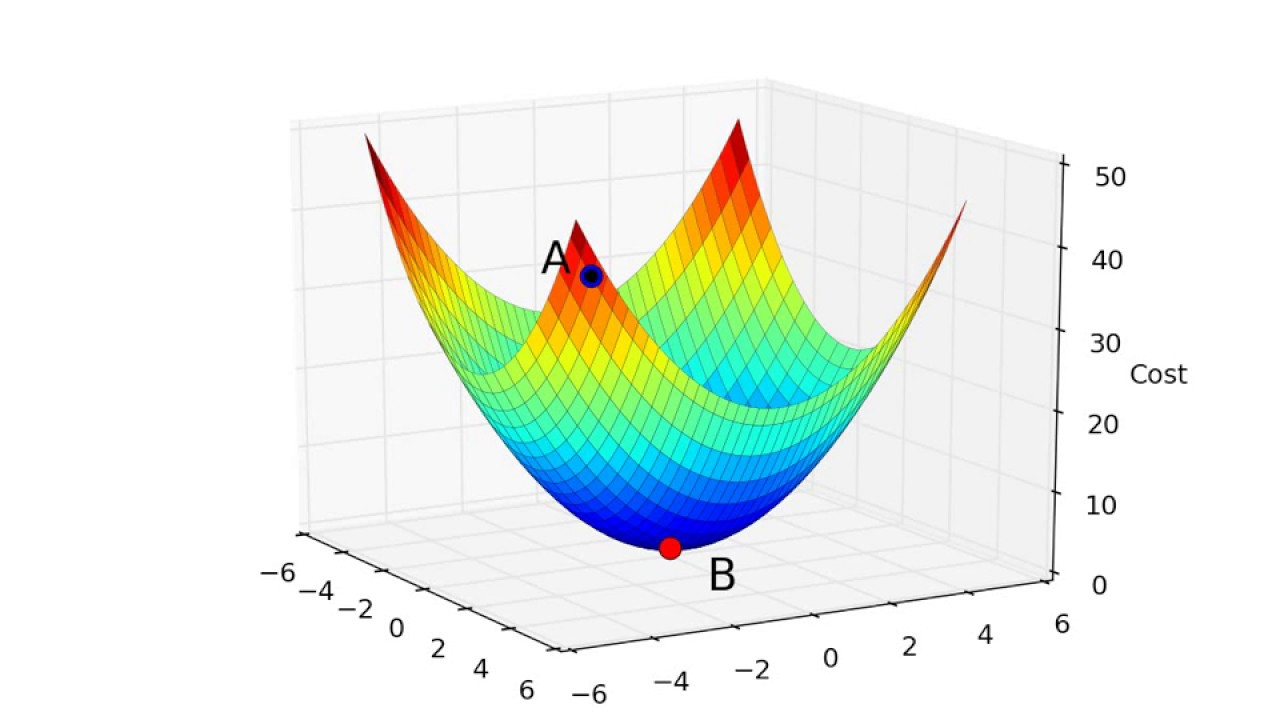

Imagina que el punto **A** es nuestra hipótesis inicial, y como queremos encontrar el valor de $a$ y $b$ que minimicen la función de error, lo que se busca es llegar al punto **B**. Conceptualmente, la derivada nos indica la velocidad a la que crece o decrece una función en uno de sus puntos. Por lo tanto, lo que debemos hacer es ir moviendo el punto **A** en la dirección de mayor pendiente para llegar a **B**. Como hay dos variables en juego, $a$ y $b$, debemos calcular las derivadas parciales de la función de error con respecto a las dos variables.

$a = a - α\frac{δ}{δa}error(a,b)$

$b = b - α\frac{δ}{δb}error(a,b)$

El parámetro $α$ es lo que se llama la **tasa de aprendizaje**, y permite controlar la velocidad de descenso hacia el punto mínimo de la función. Un valor bajo hará que la convergencia sea lenta, mientras que un valor alto puede hacer que nos pasemos de frenada y acabemos dando santos de un lado a otro de la función sin alcanzar nunca el mínimo. Valores típicos son 0.1, 0.001, etc.

Si resolvemos las derivadas parciales obtenemos lo siguiente:

$a = a - α\frac{1}{n}\sum_{i=1}^{n}(h(x_i)-y_i)$

$b = b - α\frac{1}{n}\sum_{i=1}^{n}((h(x_i)-y_i)x_i)$

En teoría, cada vez que recalculamos estas dos ecuaciones, estaremos más y más cerca del mínimo de la función de error, y por lo tanto, nuestra recta se ajustará mejor a la nube de puntos.

In [9]:
# hacer la función (J) que calcula el coste
def J(x:list,y:list,a:float,b:float):
    n=len(x);
    assert len(y)==n;
    error=0.0;
    for i in range(n):
        h = a+b*x[i];
        error += (h - y[i])**2;
    return error/(2*n);

for a in range(-3,+3):
    for b in range(-2,+2):
        print(J(x,y,float(a),float(b)))
# implementar la función que hace el descenso del gradiente
def GD(x,y,a,b,alpha,epochs):
    n = len(x);
    hJ=[];
    for ep in range(epochs):
        a_deriv=0;
        b_deriv=0;
        for i in range(n):
            hipotesis=a+b*x[i];
            a_deriv += hipotesis - y[i];
            b_deriv += (hipotesis - y[i])*x[i];
        a = a - alpha*(a_deriv/n);
        b = b - alpha*(b_deriv/n);
        hJ.append(J(x,y,a,b))
    return a,b, hJ;

20603.975747107426
10693.298157167701
4066.120567227976
722.4429772882523
20421.11769730334
10559.94010736361
3982.2625174238883
688.084927484165
20239.25964749925
10427.582057559528
3899.4044676198014
654.726877680077
20058.401597695163
10296.224007755438
3817.546417815714
622.3688278759888
19878.54354789107
10165.86595795135
3736.688368011626
591.0107780719015
19699.68549808699
10036.507908147263
3656.830318207537
560.6527282678135


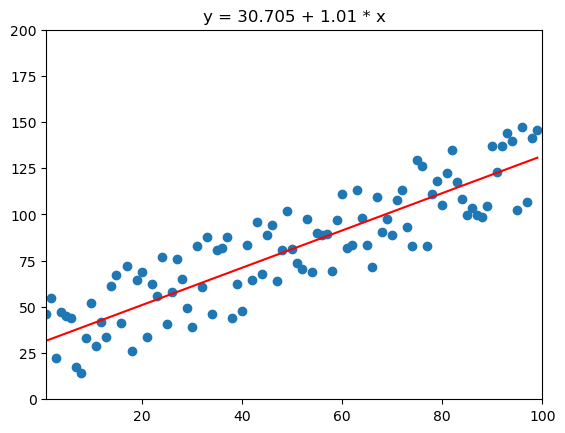

In [19]:
# probarlo (y dibujarlo)
a=1;
b=2;
alpha=0.0001;
epochs=100000;
a,b,hJ=GD(x,y,a,b,alpha,epochs);
plt.scatter(x,y);
pred_x=[0, max(x)];
pred_y=[a+b*0, a+b*max(x)];
plt.title(f"y = {round(a,3)} + {round(b,3)} * x");
plt.axis([1,100,0,200])
plt.plot(pred_x, pred_y, "r");

Error 19.165719423818782


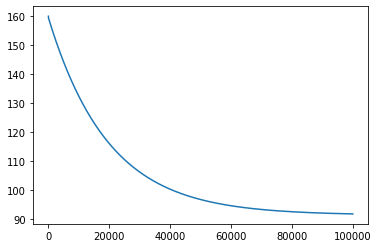

In [ ]:
# representar la curva de apredizaje
plt.plot(range(lenh(hJ)[8:]))

**Pregunta**:

¿Y si en vez de tener un $x$ para predecir un $y$, tenemos $x_1, x_2, ..., x_n$ para predecir un $y$?

Siguiendo el ejemplo de las casas, es como tener más información de las viviendas (habitaciones, baños, etc ... además que los m$^2$) para estimar el precio.